# Tutorial Julia for Data Science

## 11 Visualizzazioni, grafici.

Questa parte mostra alcuni dei modi principali grazie ai quali possiamo rappresentare informazioni sui dati in maniera visuale tramite grafici ricchi di informazioni.    
Nello specifico vedremo come creare plot a barre, a violino, con barre di errore(?), grafici con assi doppi e plot 2d che rappresentano dati 3d.   
Iniziamo inizializzando ambiente:

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.resolve()

mkpath("downloads")
mkpath("out")

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\tutorial\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\tutorial\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\tutorial\Manifest.toml`


"out"

In [2]:
using Plots
using StatsPlots # this package provides stats specific plotting functions
gr()
using Statistics
using StatsBase
using MLBase
using XLSX
using DataFrames
using ColorSchemes

Ci servirà una struttura per convertire facilmente i nomi completi degli stati in abbreviazioni, usiamo un dizionario:

In [3]:
stateabbreviations = Dict("Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CT",
    "Delaware" => "DE",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KS",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH",
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC",
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PA",
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT",
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY", 
    "District of Columbia"=>"DC");

C'è un problema nel visualizzare etichette dell asse x lunghe, lo aggiriamo con una funzione che forza un  pò di spazio vuoto in basso.

In [5]:
function pad_empty_plot(p)
    ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
    newplot = plot(p,ep,layout=@layout([a{0.99h};b{0.001h}]))
    return newplot
end

pad_empty_plot (generic function with 1 method)

### Dati
I dati che useremo sono informazioni su varie regioni degli stati uniti, divisi per stato, comprendenti i prezzi medi delle case per anno, per ogni regione.

In [7]:
file = download("https://github.com/JuliaAcademy/DataScience/blob/master/data/zillow_data_download_april2020.xlsx?raw=true",
    "downloads/zillow_data_download_april2020.xlsx")
D = DataFrame(XLSX.readtable("downloads/zillow_data_download_april2020.xlsx", "Sales_median_price_city")...);
dropmissing!(D)
states = D[:,:StateName]
#useremo dati su regioni deli stati: ny, calif e florida
#creiamo un df per ogni stato
NYids = findall(states.=="New York")
NYframe = dropmissing(D[NYids,:])
CAids = findall(states.=="California")
CAframe = dropmissing(D[CAids,:])
FLids = findall(states.=="Florida")
FLframe = dropmissing(D[FLids,:]);

### Violin Plot
Rappresentiamo densità dei prezzi nel febbraio 2020 delle regioni dei tre stati con violin plots:

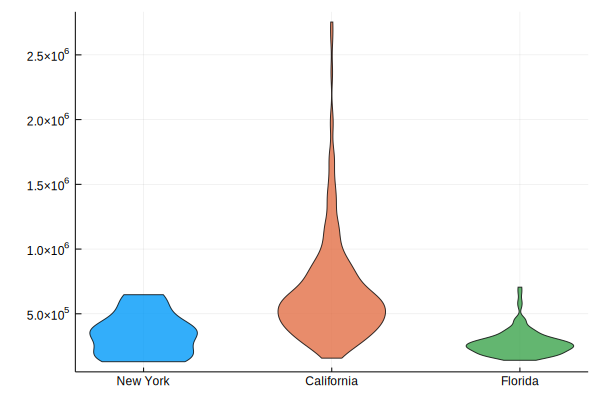

In [9]:
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]

violin(["New York"], ny,legend=false,alpha=0.8)
violin!(["California"], ca,alpha=0.8)
violin!(["Florida"],fl,alpha=0.8)

Vediamo da subito che California ha molta più varietà di prezzi rispetto agli altri due stati e che Florida ha prezzi medi bassi.

I grafici sono simmetrici, ciò significa che stiamo sprecando spazio.  
Aggiustiamo togliendo le metà superflue e sostituendole con il grafico degli stessi valori ma di 10 anni prima.  
Inoltre per distinguere gli stati non ci serve colorazione, bastano le xlabel(xtick), usiamo quindi colore, unito a una piccola legenda, per distinguere le due annate:  

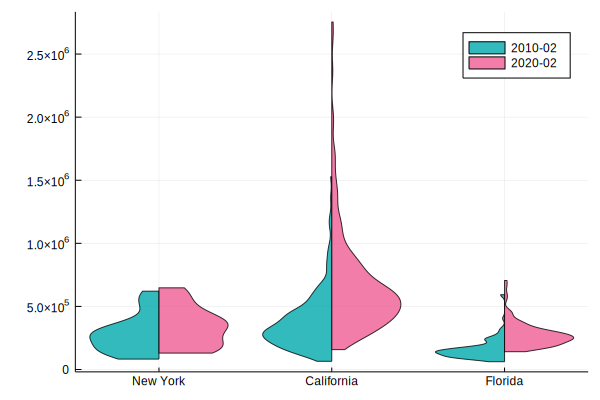

In [11]:
#dati 2010
ca = CAframe[!,Symbol("2010-02")]
ny = NYframe[!,Symbol("2010-02")]
fl = FLframe[!,Symbol("2010-02")]
#plotto dati 2010 NB: side:left
violin(["New York"], ny,alpha=0.8,side=:left,color=6,label="2010-02")
violin!(["California"], ca,alpha=0.8,side=:left,color=6,label="")#annullo label degli altri sottografici, ne basta uno
violin!(["Florida"],fl,alpha=0.8,side=:left,color=6,label="")
#dati 2020
ca = CAframe[!,Symbol("2020-02")]
ny = NYframe[!,Symbol("2020-02")]
fl = FLframe[!,Symbol("2020-02")]
#plotto dati 2020 NB: side:right
violin!(["New York"], ny,alpha=0.8,side=:right,color=7,label="2020-02")
violin!(["California"], ca,alpha=0.8,side=:right,color=7,label="")
violin!(["Florida"],fl,alpha=0.8,side=:right,color=7,label="")

Possiamo arricchire il grafico di informazioni aggiungendo delle etichette riguardo ai valoiri delle mediane:  

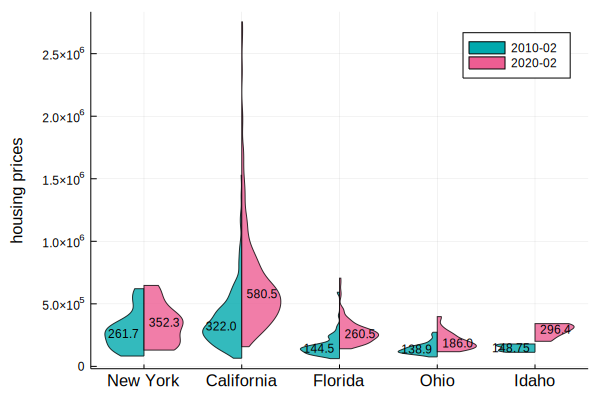

In [16]:
ep = 0.05 # will later be used in padding for annotations
plot(xtickfont=font(11))#inizializza plot

states_of_interest = ["New York", "California", "Florida", "Ohio","Idaho"]
years_of_interst = [Symbol("2010-02"),Symbol("2020-02")]

# year 1
xstart = 0.5
yi = years_of_interst[1]#prende dati della prima annata degli stati che ci interessano
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart-ep,m+0.05,text(m/1000,8,:right))])#aggiunge annotazione mediana
    xstart += 1#prossima nota sarà scritta 1 + in là
    violin!([si], curprices,alpha=0.8,side=:left,color=6,label="")
end
plot!(Shape([],[]),color=6,label=yi)

# year 2
xstart = 0.5
yi = years_of_interst[2]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart+ep,m+0.05,text(m/1000,8,:left))])
    xstart += 1
    violin!([si], curprices,alpha=0.8,side=:right,color=7,label="")
end
plot!(Shape([],[]),color=7,label=yi)
ylabel!("housing prices")

### Bar plot
Facciamo un plot a barre che rappresenta quante regioni ci sono in ogni stato.   
Per facilitare la lettura ordiniamo anche le barre e aggiungiamo i nomi dei 3 stati con più regioni:

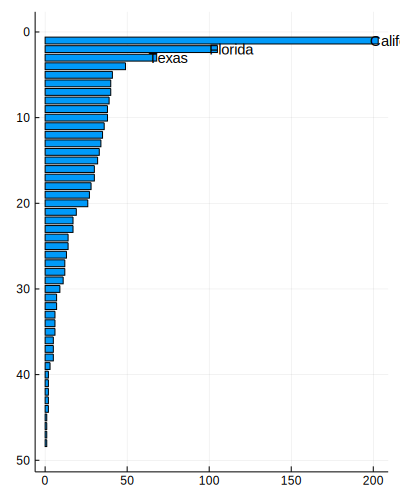

In [20]:
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
h = fit(Histogram, stateids,nbins=length(mapstates))
sortedids = sortperm(h.weights,rev=true)
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,size=(400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:3
    annotate!([(h.weights[sortedids][i]-5,i,text(stateannotations[i],10,:left))])
end
plot!()

Puliamo un pò la grafica togliendo le linee e mettendo le etichette ridotte:  

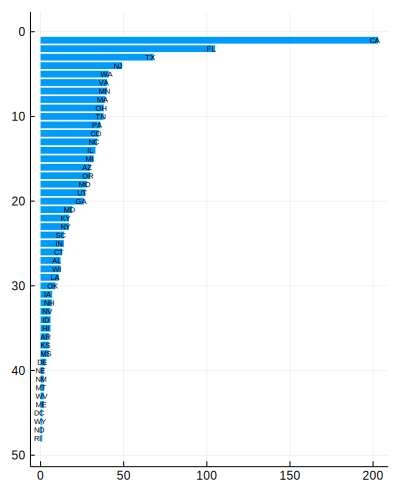

In [21]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,size=(400,500))

stateannotations = mapstates.vs[sortedids]
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],5,:left))])
end
plot!()

Poichè non ci servono distinzioin di colore è meglio usare colori più tenui (eg: grigio) inoltre, per far veder meglio i valori delle barre, dividiamole in barre da 20 unità.  
Infine creiamo un piccolo inset contenente i valori delle barre più piccole con scala ingrandita per vederle meglio.

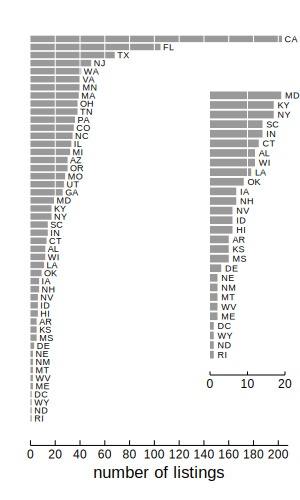

In [22]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,color=:gray,alpha=0.8,size=(300,500))
stateannotations = mapstates.vs[sortedids]
ht = length(h.weights)
for i = 20:20:200
    plot!([i,i],[ht,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]+2,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)+5),xticks = 0:20:200)
xlabel!("number of listings")

f = Plots.plot!(inset = bbox(0.7,0.15,0.25,0.6,:top,:left))
bar!(f[2],h.weights[sortedids][21:end],legend=false,orientation = :horizontal,
        yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
for i = 21:length(stateannotations)
    annotate!(f[2],[(h.weights[sortedids][i]+1,i-20,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(f[2],[10,10],[20,0],color=:white,xticks=0:10:20,yaxis=false,grid=false,xlim=(0,20))
plot!()

### Plot con error bars
Vediamo adesso come rappresentare l'andamento dei prezzi delle varie regioni.  
Proviamo prima con un semplice grafico sui cambiamenti di prezzo:

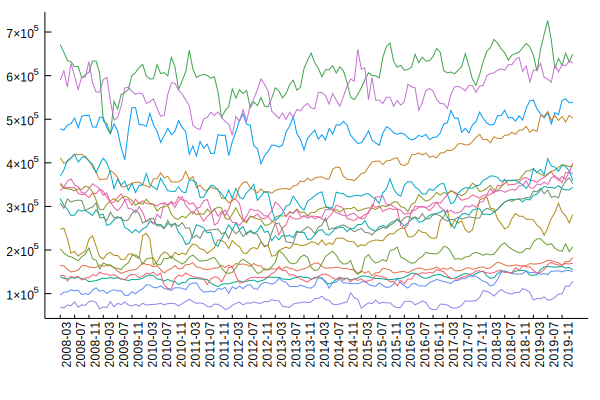

In [23]:
M = Matrix(NYframe[:,5:end])
xtickslabels = string.(names(NYframe[!,5:end]));
plot()
for i = 1:size(M,1)
    plot!(M[i,:],legend=false)
end
plot!()
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8),grid=false)
pad_empty_plot(p)#padding aggiunto per vedere le etichette asse x

Un grafico del genere non è molto indicativo dell'andamento.  
Proviamo adesso, per NY, a plottare l'andamento sia della mediana che dei percentili a livelli 20 e 80:

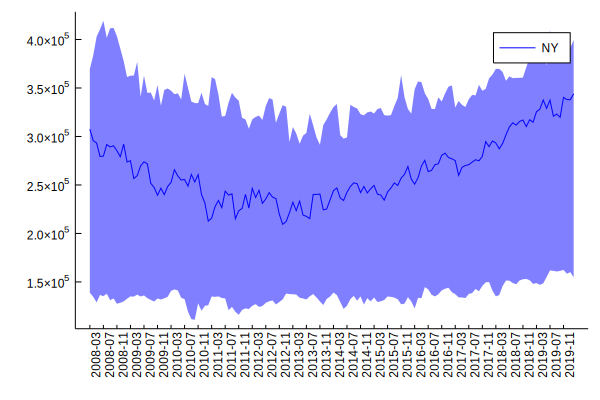

In [24]:
function find_percentile(M, pct)#fun per trovare percentili
    r = zeros(size(M,2))
    for i = 1:size(M,2)
        v = M[:,i]
        len = length(v)
        ind = floor(Int64,pct*len)
        newarr = sort(v);
        r[i] = newarr[ind];
    end
    return r
end

md = find_percentile(M,0.5)#mediana è percentile 50%
mx = find_percentile(M,0.8)
mn = find_percentile(M,0.2)
plot(md,ribbon =(md.-mn,mx.-md),color = :blue,label="NY",grid=false)
p = plot!(xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
pad_empty_plot(p)

Creiamo una funzione che prenda tutti i quantili per uno stato:

In [25]:
function plot_individual_state!(plotid,statevalue,colorid)
    curids = findall(states.==statevalue)
    curFrame = D[curids,:]
    M = Matrix(curFrame[:,5:end])
    md = find_percentile(M,0.5)
    mx = find_percentile(M,0.8)
    mn = find_percentile(M,0.2)
    plot!(plotid,md,ribbon =(md.-mn,mx.-md),color = colorid,label=stateabbreviations[statevalue],grid=false)
    plot!(plotid,xticks = (1:4:length(xtickslabels),xtickslabels[1:4:end]),xrotation=90,xtickfont=font(8))
end

plot_individual_state! (generic function with 1 method)

Proviamo adesso a tracciare un grafico che mostri gli andamenti dei prezzi in alcuni stati:

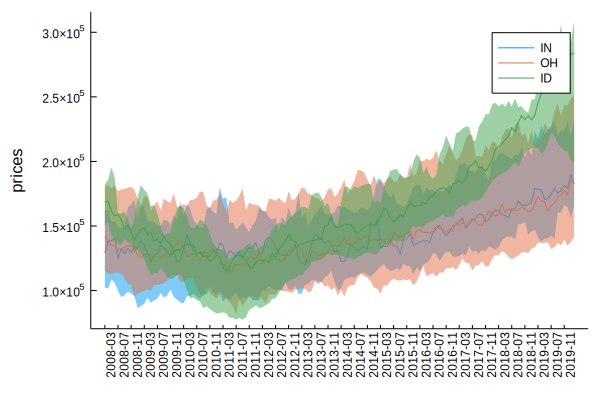

In [26]:
plotid = plot()#plot vuoto
plot_individual_state!(plotid,"Indiana",1)
plot_individual_state!(plotid,"Ohio",2)
plot_individual_state!(plotid,"Idaho",3)
# plot_individual_state!(plotid,"California",4)
ylabel!("prices")
pad_empty_plot(plotid)

### Plot con doppi assi
Potremmo voler confrontare l andamento di una variabile rispetto a un altra contro l'andamento di una terza variabile rispetto alla seconda.  
Possiamo fare ciò tracciando entrambi gli andamenti nello stesso grafico con doppio asse:

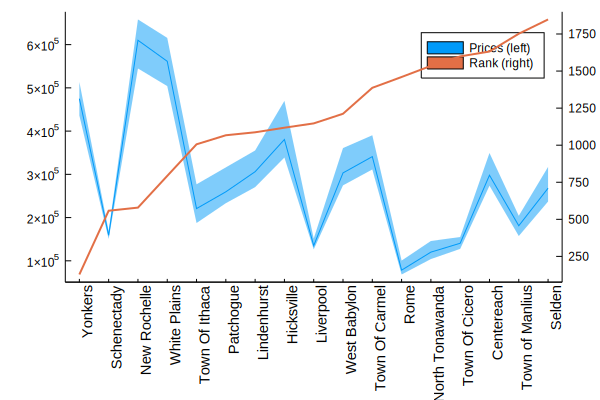

In [28]:
xtickslabels = NYframe[!,:RegionName]
sz = NYframe[!,:SizeRank]
pc = NYframe[!,end]
M = Matrix(NYframe[:,5:end])
M = copy(M')
md = find_percentile(M,0.9)

md = find_percentile(M,0.5)
mx = find_percentile(M,0.9)
mn = find_percentile(M,0.1)
vector1 = sz

plot()
plot!(md,ribbon =(md.-mn,mx.-md),color = 1,grid=false,label="")

plot!(xticks = (1:length(xtickslabels),xtickslabels),xrotation=90,xtickfont=font(10))
plot!(twinx(), vector1,color=2,label="",ylabel="rank",grid=false,xticks=[],linewidth=2)
plot!(Shape([],[]),color=1,label="Prices (left)")
p = plot!(Shape([],[]),color=2,label="Rank (right)")

ep = plot(grid=false,legend=false,axis=false,framestyle = :box)#empty plot
plot(p,ep,layout=@layout([a{0.85h};b{0.001h}]))

### Plot a più dimensioni in 2D
Per rappresentare l'andamento di 3 variabili nello stesso grafico senza dover gestire il 3D possiamo anche fare un grafico 2D dove una delle variabili è espressa tramite una graduazione colore invece che con un asse.  

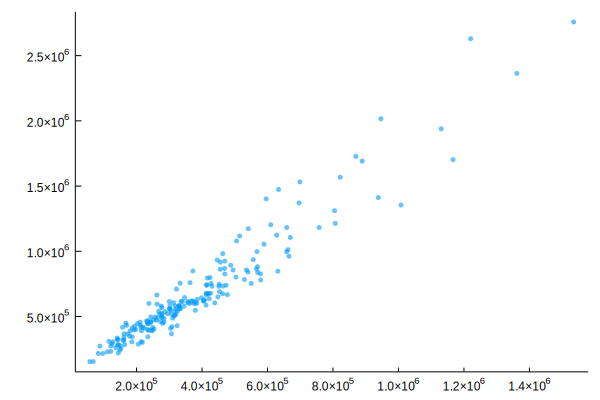

In [29]:
CA202002 = CAframe[!,Symbol("2020-02")]
CA201002 = CAframe[!,Symbol("2010-02")]
CAranks = CAframe[!,:SizeRank]
scatter(CA201002,CA202002,legend=false,markerstrokewidth=0,markersize=3,alpha=0.6,grid=false)

Un grafico simile è però difficile da leggere, proviamo quindi a usare una mappatura di colore pù comprensibile:

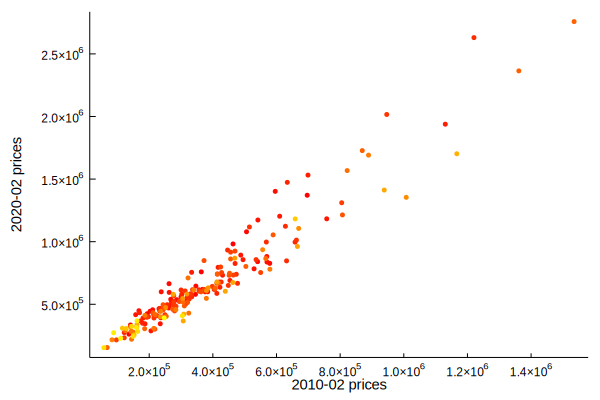

In [30]:
# normalize the ranks to be between 0 and 1
continuousranks = CAranks./maximum(CAranks)

# create a placeholder vector that will store the color of each value
colorsvec = Vector{RGB{Float64}}(undef,length(continuousranks))

# and finally map the colors according to ColorSchemes.autumn1, there are many other schemes you can choose from
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousranks[i]),1:length(colorsvec))

continuousdates = CAranks./maximum(CAranks)
colorsvec = Vector{RGB{Float64}}(undef,length(continuousdates))
map(i->colorsvec[i]=get(ColorSchemes.autumn1,continuousdates[i]),1:length(colorsvec))
scatter(CA201002,CA202002,color=colorsvec,
    legend=false,markerstrokewidth=0,markersize=3,grid=false)
xlabel!("2010-02 prices",xguidefontsize=10)
ylabel!("2020-02 prices",yguidefontsize=10)
p1 = plot!()

Per avere una legenda sul significato del colore dei punti costruiamo una heatmap plottando il colore ed aggiungendoci delle etichette a valori rappresentati:

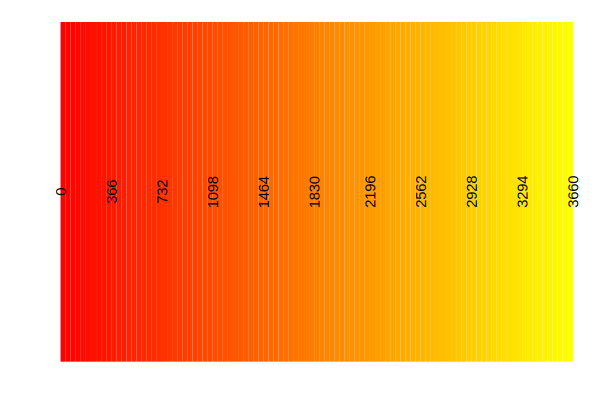

In [31]:
xvals = 0:100
s = Shape([0,1,1,0],[0,0,1,1])
plot(s,color=ColorSchemes.autumn1[1],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)

for i = 2:101
    s = Shape([xvals[i],xvals[i]+1,xvals[i]+1,xvals[i]],[0,0,1,1])
    plot!(s,color=ColorSchemes.autumn1[i],grid=false,axis=false,
    legend=false,linewidth=0,linecolor=nothing)
end

mynormalizer = maximum(CAranks)
xtickslabels = 0:div(mynormalizer,10):mynormalizer
continuousdates = xtickslabels./mynormalizer
xticksloc = round.(Int,continuousdates.*101)

# annotate using the ranks
rotatedfont = font(10, "Helvetica",rotation=90)
for i = 1:length(xtickslabels)
    annotate!(xticksloc[i],0.5,text(xtickslabels[i], rotatedfont))
end
p2 = plot!()

Possiamo aggiungere la heatmap sotto il grafico per renderla consultabile al volo durante la lettura del gfrafico:

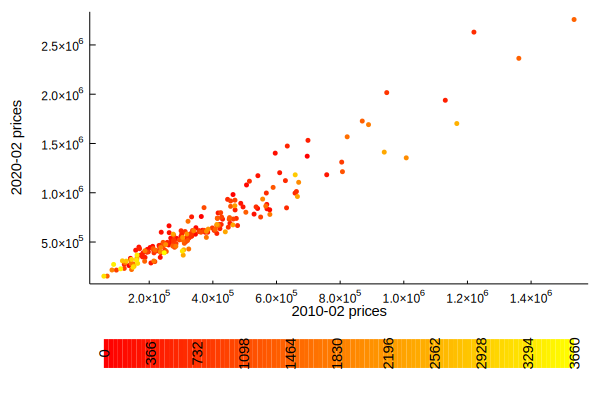

In [32]:
mylayout = @layout([a{0.89h};b{0.1h}])
plot(p1,p2,layout=mylayout)